# Advanced Quantum Circuitry

Welcome to the Advanced Quantum Circuitry notebook. This notebook will cover advanced topics in quantum circuitry, including circuit optimization, error correction, and advanced quantum gates. Understanding these concepts is crucial for developing efficient and robust quantum circuits.

First lets visualize a basic quantum circuit:

## Quantum Circuit Optimization

Optimizing quantum circuits is essential for reducing the number of gates and the depth of the circuit, which in turn reduces the error rates and improves the performance of quantum algorithms.

### Techniques for Optimization

1. **Gate Cancellation**: Identifying and removing pairs of gates that cancel each other out.
2. **Gate Merging**: Combining multiple gates into a single gate to reduce the overall gate count.
3. **Circuit Rewriting**: Rewriting parts of the circuit using more efficient gate sequences.

### Example: Gate Cancellation

Let's demonstrate gate cancellation using Qiskit.

Original Circuit:


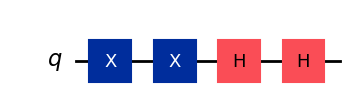

In [31]:
from qiskit import QuantumCircuit

# Create a quantum circuit with redundant gates
qc = QuantumCircuit(1)
qc.x(0)
qc.x(0)
qc.h(0)
qc.h(0)

# Visualize the original circuit
print("Original Circuit:")
qc.draw('mpl')

Optimized Circuit:


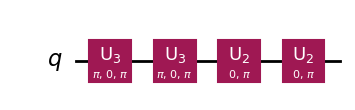

In [32]:
# Optimize the circuit by removing redundant gates
optimized_qc = qc.decompose()

# Visualize the optimized circuits
print("Optimized Circuit:")
optimized_qc.draw('mpl')

### Example: Gate Merging

Let's demonstrate gate merging using Qiskit.

Original Circuit:


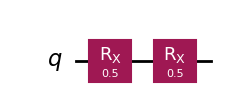

In [33]:
from qiskit import QuantumCircuit

# Create a quantum circuit with consecutive rotation gates
qc = QuantumCircuit(1)
qc.rx(0.5, 0)
qc.rx(0.5, 0)

# Visualize the original circuit
print("Original Circuit:")
qc.draw('mpl')

Optimized Circuit:


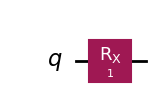

In [34]:
# Optimize the circuit by merging consecutive rotation gates
optimized_qc = QuantumCircuit(1)
optimized_qc.rx(1.0, 0)  # Combine the two rx(0.5) gates into a single rx(1.0) gate

# Visualize the optimized circuit
print("Optimized Circuit:")
optimized_qc.draw('mpl')

### Example: Circuit Rewriting

Let's demonstrate circuit rewriting using Qiskit.

Original Circuit:


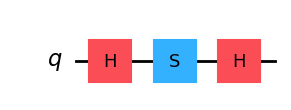

In [35]:
from qiskit import QuantumCircuit

# Create a quantum circuit with a specific structure
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
qc.h(0)

# Visualize the original circuit
print("Original Circuit:")
qc.draw('mpl')

Optimized Circuit:


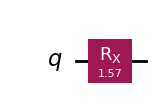

In [36]:
# Optimize the circuit by rewriting it using different gates
optimized_qc = QuantumCircuit(1)
optimized_qc.rx(3.14159/2, 0)  # Replace H-S-H with a single Rx(pi/2) gate

# Visualize the optimized circuit
print("Optimized Circuit:")
optimized_qc.draw('mpl')

## Quantum Error Correction

Quantum error correction is crucial for protecting quantum information from errors due to decoherence and other quantum noise.

### Example: Implementing a Simple Error Correction Code

Let's implement a simple three-qubit bit-flip code using Qiskit.

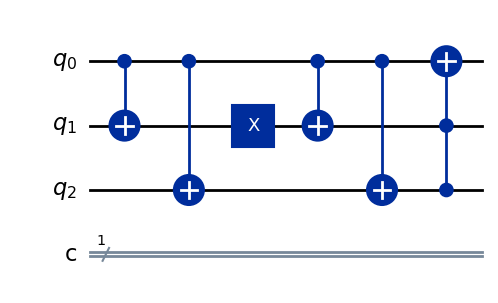

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a quantum circuit for the three-qubit bit-flip code
qc = QuantumCircuit(3, 1)

# Encode the logical qubit
qc.cx(0, 1)
qc.cx(0, 2)

# Introduce an error (X gate on the second qubit)
qc.x(1)

# Decode the logical qubit
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)


# Visualize the circuit
qc.draw('mpl')


In [7]:
# Measure the logical qubit
qc.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(qc)
print("Measurement results:", counts)

Measurement results: {'0': 1024}


The measurement results {'0': 1024} mean that in all 1024 runs of the circuit, the first qubit was measured in the state |0⟩. This indicates that the error correction process was successful, and the logical qubit was correctly restored to its original state |0⟩ despite the introduced error.

### Common Quantum Error Correction Codes

1. **Shor Code**: Encodes one qubit into nine qubits to correct arbitrary single-qubit errors.
2. **Steane Code**: Encodes one qubit into seven qubits to correct single-qubit errors.

### Example: Implementing Shors Code

Shor's code encodes one qubit into nine qubits to correct arbitrary single-qubit errors. Here is an example of how to implement Shor's code on a given circuit.

In [39]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a quantum circuit for Shor's code
shor_qc = QuantumCircuit(9, 1)

# Encode the logical qubit |0⟩ into Shor's code
shor_qc.h(0)
shor_qc.cx(0, 3)
shor_qc.cx(0, 6)
shor_qc.cx(3, 4)
shor_qc.cx(3, 5)
shor_qc.cx(6, 7)
shor_qc.cx(6, 8)

# Introduce an error (X gate) on qubit 0
shor_qc.x(0)

# Decode the logical qubit
shor_qc.cx(6, 8)
shor_qc.cx(6, 7)
shor_qc.cx(3, 5)
shor_qc.cx(3, 4)
shor_qc.cx(0, 6)
shor_qc.cx(0, 3)
shor_qc.h(0)

# Measure the logical qubit
shor_qc.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(shor_qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print("Measurement results:", counts)

Measurement results: {'0': 1024}


### Example: Implementing Steanes Code

Steane's code encodes one qubit into seven qubits to correct arbitrary single-qubit errors. Here is an example of how to implement Steane's code on a given circuit.

In [40]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a quantum circuit for Steane's code
steane_qc = QuantumCircuit(7, 1)

# Encode the logical qubit |0⟩ into Steane's code
steane_qc.h(0)
steane_qc.cx(0, 3)
steane_qc.cx(0, 5)
steane_qc.cx(3, 1)
steane_qc.cx(3, 6)
steane_qc.cx(5, 2)
steane_qc.cx(5, 4)

# Introduce an error (X gate) on qubit 0
steane_qc.x(0)

# Decode the logical qubit
steane_qc.cx(5, 4)
steane_qc.cx(5, 2)
steane_qc.cx(3, 6)
steane_qc.cx(3, 1)
steane_qc.cx(0, 5)
steane_qc.cx(0, 3)
steane_qc.h(0)

# Measure the logical qubit
steane_qc.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(steane_qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print("Measurement results:", counts)

Measurement results: {'0': 1024}


## Advanced Quantum Gates

Advanced quantum gates are essential for building complex quantum circuits. Here, we will explore some of these gates.

### Toffoli Gate (CCX)

The Toffoli gate is a three-qubit gate that flips the state of the target qubit if both control qubits are in state |1>.

### Example: Toffoli Gate

Let's implement the Toffoli gate using Qiskit.

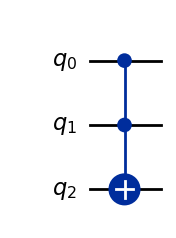

In [41]:
from qiskit import QuantumCircuit

# Create a quantum circuit with three qubits
qc = QuantumCircuit(3)

# Apply the Toffoli gate (CCX)
qc.ccx(0, 1, 2)

# Visualize the circuit
qc.draw('mpl')

### Fredkin Gate (CSWAP)

The Fredkin gate is a three-qubit gate that swaps the states of the second and third qubits if the first qubit is in state |1>.

### Example: Fredkin Gate

Let's implement the Fredkin gate using Qiskit.

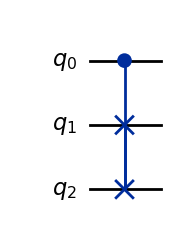

In [42]:
from qiskit import QuantumCircuit

# Create a quantum circuit with three qubits
qc = QuantumCircuit(3)

# Apply the Fredkin gate (CSWAP)
qc.cswap(0, 1, 2)

# Visualize the circuit
qc.draw('mpl')

### Multi-Control Gates

Multi-control gates have more than one control qubit and are used for complex operations.

### Example: Multi-Control Gate

Let's implement the Multi-Control gate using Qiskit.

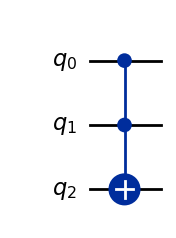

In [43]:
from qiskit import QuantumCircuit

# Create a quantum circuit with three qubits
qc = QuantumCircuit(3)

# Apply a multi-controlled X gate (MCX)
qc.mcx([0, 1], 2)

# Visualize the circuit
qc.draw('mpl')

## Universal Gate Sets

A universal gate set is a set of quantum gates that can be used to approximate any unitary operation to arbitrary precision. Universal gate sets are essential for building general-purpose quantum computers.

### Examples of Universal Gate Sets

1. **Clifford+T Gate Set**
   - Consists of the Clifford gates (H, S, CNOT) and the T gate.
   - Proven to be universal for quantum computation.

2. **{H, T, CNOT} Gate Set**
   - Another common universal gate set.
   - Includes the Hadamard gate (H), the π/8 gate (T), and the CNOT gate.

3. **{X, Y, Z, H, S, T, CNOT} Gate Set**
   - A more comprehensive universal gate set.
   - Includes the Pauli gates (X, Y, Z), the Hadamard gate (H), the phase gate (S), the π/8 gate (T), and the CNOT gate.

### Proof of Universality

To prove that a gate set is universal, we need to show that any unitary operation can be approximated using a finite sequence of gates from the set. This involves demonstrating that the gate set can generate a dense subset of the unitary group.

## Example: Universal Gate Set Implementation

Let's implement a universal gate set in Qiskit and create a simple quantum circuit using this gate set.

### Implementing the {H, T, CNOT} Gate Set

We will use the Hadamard gate (H), the π/8 gate (T), and the CNOT gate to create a simple quantum circuit.

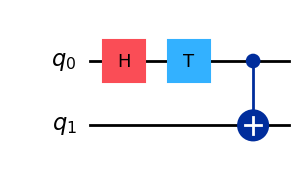

In [44]:
from qiskit import QuantumCircuit

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a T gate to the first qubit
qc.t(0)

# Apply a CNOT gate with the first qubit as control and the second qubit as target
qc.cx(0, 1)

# Visualize the circuit
qc.draw('mpl')

## Quantum Circuit Simulation

Quantum circuits can be used to simulate physical systems. Here, we will simulate a simple molecule.

### Example: Simulating a Simple Molecule

Let's simulate the hydrogen molecule using Qiskit.

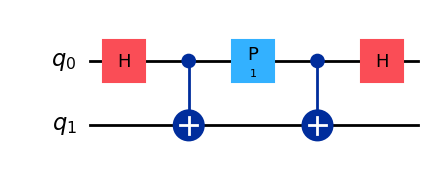

In [26]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, StatevectorSimulator

# Create a quantum circuit to simulate the hydrogen molecule
qc = QuantumCircuit(2)

# Apply gates to simulate the molecule
qc.h(0)
qc.cx(0, 1)
qc.p(1.0, 0)
qc.cx(0, 1)
qc.h(0)

# Visualize the circuit
qc.draw('mpl')

In [30]:
# Simulate the circuit using StatevectorSimulator
simulator = StatevectorSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the statevector simulator
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector(compiled_circuit)
print("Statevector:", statevector)

Statevector: Statevector([0.77015115+0.42073549j, 0.22984885-0.42073549j,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2))


### Statevector Interpretation

The statevector indicates that after applying the gates in the quantum circuit, the system is in a superposition of the states |00⟩ and |01⟩. The statevector is:

#### Basis States and Amplitudes
- |00⟩: `0.77015115 + 0.42073549j`
- |01⟩: `0.22984885 - 0.42073549j`
- |10⟩: `0.0 + 0.0j`
- |11⟩: `0.0 + 0.0j`

#### Probabilities
The probability of measuring a particular basis state is the square of the magnitude of its amplitude.

- **Probability of |00⟩**:
|0.77015115 + 0.42073549j|^2 = 0.77015115^2 + 0.42073549^2 ≈ 0.75
- **Probability of |01⟩**:
|0.22984885 - 0.42073549j|^2 = 0.22984885^2 + 0.42073549^2 ≈ 0.25
- **Probability of |10⟩**:
|0.0 + 0.0j|^2 = 0
- **Probability of |11⟩**:
0.0 + 0.0j|^2 = 0


### Summary
The statevector indicates that after applying the gates in the quantum circuit, the system is in a superposition of the states |00⟩ and |01⟩, with probabilities of approximately 75% and 25%, respectively. The states |10⟩ and |11⟩ have zero probability of being measured. This information provides insight into the behavior and outcome of the quantum circuit.
